# Quantized FACILE Training with Brevitas
This notebook walks through the steps to train and and validate the Pytorch Brevitas reconstruction of the HCAL Facile model

Initial Pytorch conversion by Vladimir Oveckhin
Pytorch to Brevitas conversion by Matthew Trahms

In [1]:
#install pandas (missing in FINN env)
!pip install --user pandas

     |################################| 9.5MB 4.8MB/s eta 0:00:01


In [1]:
#import the necessary classes and functions
from train import train
from metrics import Metrics
from quant_model import QuantNet
from quant_modelV2 import QuantNet_opt
#from quantmodelV2_with_proc import QuantNet_opt_proc

In [2]:
models_folder = 'quant_models'

X_train shape: (229538, 14)
X_val shape: (12752, 14)
X_test shape: (12752, 14)
Y_train shape: (229538, 1)
Y_val shape: (12752, 1)
Y_test shape: (12752, 1)
Using saved split data
Number of batches per epoch: 460
# of Model parameters: 982.0
# of features: 14


Epoch 1
Ave Train Loss: 0.7507269915095715
Ave Val Loss: 24.132911318824405
Min Ave Val Loss: 24.132911318824405
Saved model


Epoch 2
Ave Train Loss: 0.4451371740287956
Ave Val Loss: 24.42932903955853
Min Ave Val Loss: 24.132911318824405


Epoch 3
Ave Train Loss: 0.4175922655481962
Ave Val Loss: 19.762927585177952
Min Ave Val Loss: 19.762927585177952
Saved model


Epoch 4
Ave Train Loss: 0.41560524854395875
Ave Val Loss: 19.96355498783172
Min Ave Val Loss: 19.762927585177952


Epoch 5
Ave Train Loss: 0.41121701650190157
Ave Val Loss: 21.51038896469843
Min Ave Val Loss: 19.762927585177952


Epoch 6
Ave Train Loss: 0.4125107675446721
Ave Val Loss: 23.55215575203063
Min Ave Val Loss: 19.762927585177952


Epoch 7
Ave Train Loss: 0.41

Ave Train Loss: 0.3930980125070735
Ave Val Loss: 22.8944215925913
Min Ave Val Loss: 17.714100671192956


Epoch 56
Ave Train Loss: 0.3917055612538211
Ave Val Loss: 18.538007948133682
Min Ave Val Loss: 17.714100671192956


Epoch 57
Ave Train Loss: 0.3883206056941305
Ave Val Loss: 18.672826312837145
Min Ave Val Loss: 17.714100671192956


Epoch 58
Ave Train Loss: 0.3914097818016112
Ave Val Loss: 18.605350161355638
Min Ave Val Loss: 17.714100671192956


Epoch 59
Ave Train Loss: 0.3924259353344004
Ave Val Loss: 19.180470633128333
Min Ave Val Loss: 17.714100671192956


Epoch 60
Ave Train Loss: 0.3907428527368826
Ave Val Loss: 20.7292546166314
Min Ave Val Loss: 17.714100671192956


Epoch 61
Ave Train Loss: 0.39409919396218235
Ave Val Loss: 21.72814196632022
Min Ave Val Loss: 17.714100671192956


Epoch 62
Ave Train Loss: 0.394265968448992
Ave Val Loss: 20.20242028009324
Min Ave Val Loss: 17.714100671192956


Epoch 63
Ave Train Loss: 0.3950165810410647
Ave Val Loss: 19.875518314422123
Min Ave Va

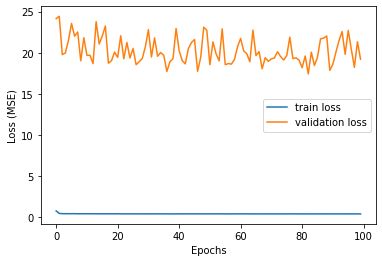

In [3]:
#train (mimicing structure in train.py)
metrics = Metrics()
model = None
try:
    model = train(QuantNet_opt, metrics=metrics, models_folder_path=models_folder, quantized=True)
except KeyboardInterrupt:
    print("Interrupted")
finally:
    metrics.plot_losses()

In [6]:
#export to onnx finn format
from brevitas.onnx import export_finn_onnx
input_shape = [1,14]
export_finn_onnx(model, input_shape, models_folder + "/facileV3_4b_1.onnx")

In [5]:
print(model)

QuantNet_opt(
  (bn0): BatchNorm1d(14, eps=1e-05, momentum=0.6, affine=True, track_running_stats=True)
  (qinp): QuantIdentity(
    (input_quant): IdentityQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
    )
    (act_quant): ActQuantProxyFromInjector(
      (_zero_hw_sentinel): StatelessBuffer()
      (fused_activation_quant_proxy): FusedActivationQuantProxy(
        (activation_impl): Identity()
        (tensor_quant): RescalingIntQuant(
          (int_quant): IntQuant(
            (float_to_int_impl): RoundSte()
            (tensor_clamp_impl): TensorClamp()
            (delay_wrapper): DelayWrapper(
              (delay_impl): _NoDelay()
            )
          )
          (scaling_impl): ParameterFromRuntimeStatsScaling(
            (stats_input_view_shape_impl): OverTensorView()
            (stats): _Stats(
              (stats_impl): AbsPercentile()
            )
            (restrict_clamp_scaling): _RestrictClampValue(
              (restrict_value_impl): 